# はじめに

## 自己紹介

* 田中亮 [GitHub aktnk](https://github.com/aktnk)<img src="https://avatars.githubusercontent.com/u/13390370" width="100px" align="right">

* 会社員（社内ITエンジニア）

* Code for ふじのくに、Code for SUSONO

* 三島市、熱海市出身

# ご存知ですか？

[静岡県新型コロナウイルス感染症対策サイト](https://stopcovid19.code4numazu.org/) 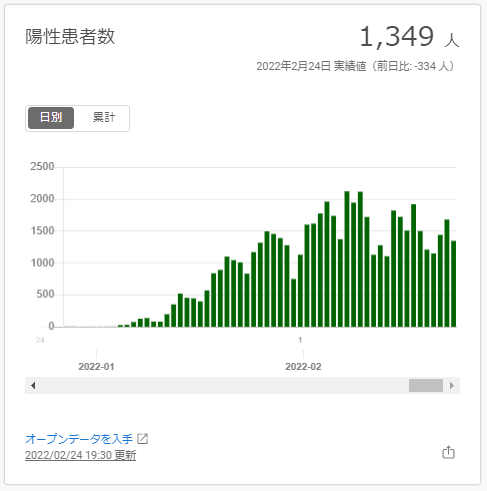

この[オープンデータを入手](https://opendata.pref.shizuoka.jp/dataset/8167.html)し、静岡県の市区町村別の陽性患者数をグラフ化してみます。
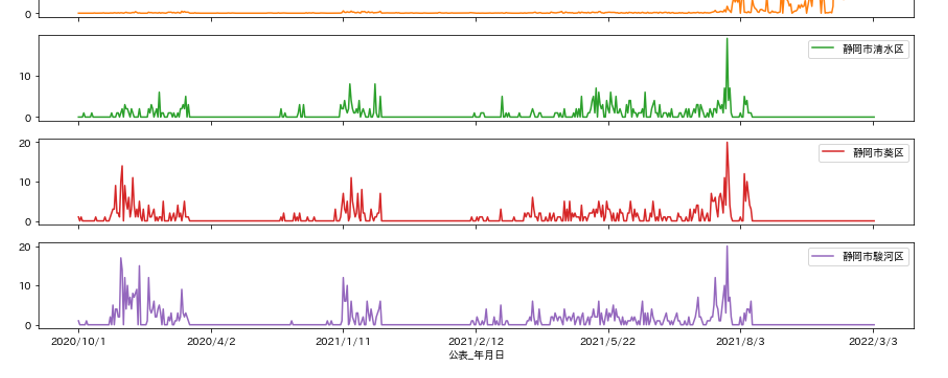

##  モジュールの読込

In [1]:
# データのダウンロード・処理・グラフ化に必要なPythonモジュールを読込
import pandas as pd
import urllib.request as req
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
import os
import re

## データの取得

### 陽性患者数に関する情報の公開しているURL 

https://opendata.pref.shizuoka.jp/dataset/8167/resource/46279/220001_shizuoka_covid19_patients.csv

[どんなデータかプレビュー](https://opendata.pref.shizuoka.jp/dataset/8167/resource/46279/content.html)

In [2]:
url = 'https://opendata.pref.shizuoka.jp/dataset/8167/resource/46279/220001_shizuoka_covid19_patients.csv'
url

'https://opendata.pref.shizuoka.jp/dataset/8167/resource/46279/220001_shizuoka_covid19_patients.csv'

In [3]:
# ダウンロードする場合
# 保存するファイル名に今日の日付を付加
filename = os.path.splitext( os.path.basename( urlparse(url).path ) )[0] + datetime.datetime.today().strftime('_%y%m%d')
filepath = filename + os.path.splitext( os.path.basename( urlparse(url).path ) )[1]
print(filepath)
# ダウンロード実行
req.urlretrieve( url, filepath)

220001_shizuoka_covid19_patients_220305.csv


('220001_shizuoka_covid19_patients_220305.csv',
 <http.client.HTTPMessage at 0x1daf0033190>)

In [ ]:
# ダウンロード済みファイルを読み込む場合
# 保存するファイル名に今日の日付を付加
filepath = os.path.basename( urlparse(url).path )
filepath

## グラフ化の準備（前処理）

In [4]:
# csvファイルの先頭10行を読み込む
df_tmp = pd.read_csv(filepath, nrows=10)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8c in position 2: invalid start byte

### CSVファイルの文字コードがutf-8でないためエラーとなった！

In [5]:
# Shift-JISで読み込む
df_tmp = pd.read_csv(filepath, nrows=10, encoding='SHIFT-JIS')
df_tmp.head()

,Unnamed: 0,3月4日,現在,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,＜患者_退院済フラグ説明＞,Unnamed: 15,Unnamed: 16
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,入院,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,退院（宿泊施設、自宅療養者、死亡含む）,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,宿泊施設,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,入院等調整中・自宅療養者,NaN
4,No,例目,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_退院済フラグ,備考,NaN


In [6]:
# 最初の5行を読み飛ばす
df = pd.read_csv(filepath, nrows=10, encoding='shift-jis', skiprows=5)
df.head(2)

,No,例目,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_退院済フラグ,備考,Unnamed: 16
0,1,1,220001,静岡県,1,2020/2/28,NaN,静岡市,60代,男性,NaN,軽症・中等症,軽い咳、のどの違和感,1,1,ダイヤモンドプリンセス号乗客,NaN
1,2,2,220001,静岡県,1,2020/3/10,NaN,神奈川県,50代,男性,NaN,軽症・中等症,発熱、咳、嘔吐,0,1,NaN,NaN


In [7]:
# 名前のない最終列を除去
df.rename({"Unnamed: 16":"qqq"}, axis="columns", inplace=True)
df.drop(["qqq"], axis=1, inplace=True)
df.head(2)

,No,例目,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_退院済フラグ,備考
0,1,1,220001,静岡県,1,2020/2/28,NaN,静岡市,60代,男性,NaN,軽症・中等症,軽い咳、のどの違和感,1,1,ダイヤモンドプリンセス号乗客
1,2,2,220001,静岡県,1,2020/3/10,NaN,神奈川県,50代,男性,NaN,軽症・中等症,発熱、咳、嘔吐,0,1,NaN


In [8]:
# 正しく読み込めそうなので、全データを読み込みます
df = pd.read_csv(filepath, encoding='shift-jis', skiprows=5)

C:\Users\sunto\AppData\Local\Temp\ipykernel_5928\972346687.py:2: DtypeWarning: Columns (10,11,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='shift-jis', skiprows=5)


In [9]:
# 警告が出ている列を確認します
[df.columns[idx] for idx in [10,11,12,15,16]]

['患者_職業', '患者_状態', '患者_症状', '備考', 'Unnamed: 16']

## 今回は'患者_居住地'別に日毎の陽性者数の推移をプロットします。
## 警告の表示されたデータは関係がないのでそのままにしておきます。

In [10]:
# 最終列の削除
df.rename({"Unnamed: 16":"qqq"}, axis="columns", inplace=True)
df.drop(["qqq"], axis=1, inplace=True)

In [11]:
# 欠けているデータを確認
df.isna().sum()

No                  0
例目                  0
全国地方公共団体コード         0
都道府県名               0
市区町村名               0
公表_年月日              0
発症_年月日          94029
患者_居住地             75
患者_年代             846
患者_性別           26670
患者_職業           90277
患者_状態           84717
患者_症状           82595
患者_渡航歴の有無フラグ    88321
患者_退院済フラグ       84717
備考              94028
dtype: int64

## 公表_年月日は欠損していませんが、発症_年月日はすべて空欄のようです
→　公表_年月日を使います。

## 患者_居住値は75個空のデータあり
→　空の箇所は”不明”とすれば問題なし。

In [12]:
df.患者_居住地.describe()

count     93954
unique       92
top         静岡市
freq      16673
Name: 患者_居住地, dtype: object

In [13]:
set(df.患者_居住地)

{nan,
 '三島市',
 '下田市',
 '京都市',
 '京都府',
 '伊東市',
 '伊豆の国市',
 '伊豆市',
 '佐賀県',
 '兵庫県',
 '函南町',
 '千葉県',
 '南伊豆町',
 '吉田町',
 '名古屋市',
 '埼玉県',
 '大阪市平野区',
 '大阪府',
 '宮城県',
 '富士保健所管内',
 '富士宮市',
 '富士市',
 '小山町',
 '山梨県',
 '岡崎市',
 '島田市',
 '川根本町',
 '市外',
 '御前崎市',
 '御殿場保健所管内',
 '御殿場市',
 '愛知県',
 '愛知県新城市',
 '愛知県豊田市',
 '掛川市',
 '東京都',
 '東伊豆町',
 '東大阪市',
 '東部保健所管内',
 '松崎町',
 '森町',
 '榛原郡',
 '横浜市',
 '沖縄県',
 '河津町',
 '沼津市',
 '浜松市',
 '浜松市\u3000',
 '浜松市\u3000中区',
 '浜松市中区',
 '浜松市内',
 '浜松市北区',
 '浜松市区',
 '浜松市南区',
 '浜松市外',
 '浜松市外（関東圏）',
 '浜松市天竜区',
 '浜松市東区',
 '浜松市浜北区',
 '浜松市西区',
 '清水町',
 '湖西市',
 '焼津市',
 '熱海保健所管内',
 '熱海市',
 '牧之原市',
 '県外',
 '県外在住',
 '県東部',
 '確認中',
 '磐田市',
 '神奈川県',
 '神奈川県川崎市',
 '福井県',
 '福岡県',
 '菊川市',
 '藤枝市',
 '袋井市',
 '裾野市',
 '西伊豆町',
 '西部保健所管内',
 '調査中',
 '豊橋市',
 '豊田市',
 '賀茂郡',
 '長泉町',
 '静岡市',
 '静岡市外',
 '静岡市清水区',
 '静岡市葵区',
 '静岡市葵区30代',
 '静岡市駿河区',
 '静岡県外'}

In [14]:
# nan：空欄になっているデータを"不明"に置き換えます
df=df.fillna({'患者_居住地': '不明'})
set(df.患者_居住地)

{'三島市',
 '下田市',
 '不明',
 '京都市',
 '京都府',
 '伊東市',
 '伊豆の国市',
 '伊豆市',
 '佐賀県',
 '兵庫県',
 '函南町',
 '千葉県',
 '南伊豆町',
 '吉田町',
 '名古屋市',
 '埼玉県',
 '大阪市平野区',
 '大阪府',
 '宮城県',
 '富士保健所管内',
 '富士宮市',
 '富士市',
 '小山町',
 '山梨県',
 '岡崎市',
 '島田市',
 '川根本町',
 '市外',
 '御前崎市',
 '御殿場保健所管内',
 '御殿場市',
 '愛知県',
 '愛知県新城市',
 '愛知県豊田市',
 '掛川市',
 '東京都',
 '東伊豆町',
 '東大阪市',
 '東部保健所管内',
 '松崎町',
 '森町',
 '榛原郡',
 '横浜市',
 '沖縄県',
 '河津町',
 '沼津市',
 '浜松市',
 '浜松市\u3000',
 '浜松市\u3000中区',
 '浜松市中区',
 '浜松市内',
 '浜松市北区',
 '浜松市区',
 '浜松市南区',
 '浜松市外',
 '浜松市外（関東圏）',
 '浜松市天竜区',
 '浜松市東区',
 '浜松市浜北区',
 '浜松市西区',
 '清水町',
 '湖西市',
 '焼津市',
 '熱海保健所管内',
 '熱海市',
 '牧之原市',
 '県外',
 '県外在住',
 '県東部',
 '確認中',
 '磐田市',
 '神奈川県',
 '神奈川県川崎市',
 '福井県',
 '福岡県',
 '菊川市',
 '藤枝市',
 '袋井市',
 '裾野市',
 '西伊豆町',
 '西部保健所管内',
 '調査中',
 '豊橋市',
 '豊田市',
 '賀茂郡',
 '長泉町',
 '静岡市',
 '静岡市外',
 '静岡市清水区',
 '静岡市葵区',
 '静岡市葵区30代',
 '静岡市駿河区',
 '静岡県外'}

In [15]:
# 全角のスペース(\u3000)を除去
df['患者_居住地']=[re.sub(r"[\u3000]","", x) for x in df.患者_居住地]
set(df.患者_居住地)

{'三島市',
 '下田市',
 '不明',
 '京都市',
 '京都府',
 '伊東市',
 '伊豆の国市',
 '伊豆市',
 '佐賀県',
 '兵庫県',
 '函南町',
 '千葉県',
 '南伊豆町',
 '吉田町',
 '名古屋市',
 '埼玉県',
 '大阪市平野区',
 '大阪府',
 '宮城県',
 '富士保健所管内',
 '富士宮市',
 '富士市',
 '小山町',
 '山梨県',
 '岡崎市',
 '島田市',
 '川根本町',
 '市外',
 '御前崎市',
 '御殿場保健所管内',
 '御殿場市',
 '愛知県',
 '愛知県新城市',
 '愛知県豊田市',
 '掛川市',
 '東京都',
 '東伊豆町',
 '東大阪市',
 '東部保健所管内',
 '松崎町',
 '森町',
 '榛原郡',
 '横浜市',
 '沖縄県',
 '河津町',
 '沼津市',
 '浜松市',
 '浜松市中区',
 '浜松市内',
 '浜松市北区',
 '浜松市区',
 '浜松市南区',
 '浜松市外',
 '浜松市外（関東圏）',
 '浜松市天竜区',
 '浜松市東区',
 '浜松市浜北区',
 '浜松市西区',
 '清水町',
 '湖西市',
 '焼津市',
 '熱海保健所管内',
 '熱海市',
 '牧之原市',
 '県外',
 '県外在住',
 '県東部',
 '確認中',
 '磐田市',
 '神奈川県',
 '神奈川県川崎市',
 '福井県',
 '福岡県',
 '菊川市',
 '藤枝市',
 '袋井市',
 '裾野市',
 '西伊豆町',
 '西部保健所管内',
 '調査中',
 '豊橋市',
 '豊田市',
 '賀茂郡',
 '長泉町',
 '静岡市',
 '静岡市外',
 '静岡市清水区',
 '静岡市葵区',
 '静岡市葵区30代',
 '静岡市駿河区',
 '静岡県外'}

## その他の置き換え
* 市外：不明
* 確認中：不明
* 調査中：不明
* 浜松市外：不明
* 浜松市外（関東圏）: 県外
* 静岡市外：不明
* 静岡県外：県外
* 県外在住:：県外
* ...
* 静岡市葵区30代：静岡市葵区

In [16]:
# 一気に置き換えます
df['患者_居住地']=df['患者_居住地'].replace({
    '市外': '不明',
    '確認中': '不明',
    '調査中': '不明',
    '浜松市外': '不明',
    '静岡市外': '不明',
    '浜松市外（関東圏）': '県外',
    '浜松市内': '浜松市',
    '浜松市区': '浜松市',
    '静岡県外': '県外',
    '県外在住': '県外',
    '静岡市葵区30代': '静岡市葵区',
    '埼玉県': '県外',
    '大阪市平野区': '県外',
    '名古屋市': '県外',
    '京都市': '県外',
    '宮城県': '県外',
    '豊橋市': '県外',
    '豊田市': '県外',
    '京都府': '県外',
    '福岡県': '県外',
    '横浜市': '県外',
    '東大阪市': '県外',
    '佐賀県': '県外',
    '兵庫県': '県外',
    '千葉県': '県外',
    '大阪府': '県外',
    '山梨県': '県外',
    '岡崎市': '県外',
    '福井県': '県外',
    '愛知県': '県外',
    '愛知県豊田市': '県外',
    '愛知県新城市': '県外',
    '東京都': '県外',
    '沖縄県': '県外',
    '神奈川県': '県外',
    '神奈川県川崎市': '県外'
})
set(df.患者_居住地)

{'三島市',
 '下田市',
 '不明',
 '伊東市',
 '伊豆の国市',
 '伊豆市',
 '函南町',
 '南伊豆町',
 '吉田町',
 '富士保健所管内',
 '富士宮市',
 '富士市',
 '小山町',
 '島田市',
 '川根本町',
 '御前崎市',
 '御殿場保健所管内',
 '御殿場市',
 '掛川市',
 '東伊豆町',
 '東部保健所管内',
 '松崎町',
 '森町',
 '榛原郡',
 '河津町',
 '沼津市',
 '浜松市',
 '浜松市中区',
 '浜松市北区',
 '浜松市南区',
 '浜松市天竜区',
 '浜松市東区',
 '浜松市浜北区',
 '浜松市西区',
 '清水町',
 '湖西市',
 '焼津市',
 '熱海保健所管内',
 '熱海市',
 '牧之原市',
 '県外',
 '県東部',
 '磐田市',
 '菊川市',
 '藤枝市',
 '袋井市',
 '裾野市',
 '西伊豆町',
 '西部保健所管内',
 '賀茂郡',
 '長泉町',
 '静岡市',
 '静岡市清水区',
 '静岡市葵区',
 '静岡市駿河区'}

〇〇保健所管内、県東部、浜松市と浜松市〇〇区、静岡市と静岡市〇〇区・・・
→　今回はそのままとします。


In [17]:
df.head()

,No,例目,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_退院済フラグ,備考
0,1,1,220001,静岡県,1,2020/2/28,NaN,静岡市,60代,男性,NaN,軽症・中等症,軽い咳、のどの違和感,1.0,1.0,ダイヤモンドプリンセス号乗客
1,2,2,220001,静岡県,1,2020/3/10,NaN,県外,50代,男性,NaN,軽症・中等症,発熱、咳、嘔吐,0.0,1.0,NaN
2,3,3,220001,静岡県,1,2020/3/12,NaN,静岡市,60代,女性,無職,軽症・中等症,下痢・軽い咳,1.0,1.0,NaN
3,4,4,220001,静岡県,1,2020/3/28,NaN,浜松市,NaN,男性,自営業,軽症・中等症,咽頭痛、発熱,0.0,1.0,NaN
4,5,5,220001,静岡県,1,2020/3/30,NaN,静岡市,40代,女性,看護師,軽症・中等症,発熱、のどの痛み,0.0,1.0,NaN


In [18]:
# インデックスを'No'列に置き換える
df.set_index('No',inplace=True)
df.head()

,例目,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_職業,患者_状態,患者_症状,患者_渡航歴の有無フラグ,患者_退院済フラグ,備考
No,,,,,,,,,,,,,,,
1,1,220001,静岡県,1,2020/2/28,NaN,静岡市,60代,男性,NaN,軽症・中等症,軽い咳、のどの違和感,1.0,1.0,ダイヤモンドプリンセス号乗客
2,2,220001,静岡県,1,2020/3/10,NaN,県外,50代,男性,NaN,軽症・中等症,発熱、咳、嘔吐,0.0,1.0,NaN
3,3,220001,静岡県,1,2020/3/12,NaN,静岡市,60代,女性,無職,軽症・中等症,下痢・軽い咳,1.0,1.0,NaN
4,4,220001,静岡県,1,2020/3/28,NaN,浜松市,NaN,男性,自営業,軽症・中等症,咽頭痛、発熱,0.0,1.0,NaN
5,5,220001,静岡県,1,2020/3/30,NaN,静岡市,40代,女性,看護師,軽症・中等症,発熱、のどの痛み,0.0,1.0,NaN


In [19]:
# 処理できるか確認
df.groupby(['公表_年月日','患者_居住地']).count()

例目  全国地方公共団体コード  都道府県名  市区町村名  発症_年月日  患者_年代  患者_性別  患者_職業  \
公表_年月日    患者_居住地                                                                
2020/10/1 掛川市       2            2      2      2       0      2      1      0   
          牧之原市      1            1      1      1       0      1      1      0   
          藤枝市       1            1      1      1       0      1      1      1   
          袋井市       4            4      4      4       0      4      0      0   
          静岡市葵区     1            1      1      1       0      1      1      1   
...               ...          ...    ...    ...     ...    ...    ...    ...   
2022/3/4  袋井市      69           69     69     69       0     69      0      0   
          裾野市      21           21     21     21       0     21      0      0   
          西伊豆町      7            7      7      7       0      7      0      0   
          長泉町      14           14     14     14       0     14      0      0   
          静岡市     213          213    213    213       0    213    202      0   

                  患者_状態  患者_症状  患者_渡航歴の有無フラグ  患者_退院済フラグ  備考  
公表_年月日    患者_居住地                                             
2020/10/1 掛川市         2      2             2          2   0  
          牧之原市        1      1             1          1   0  
          藤枝市         1      1             1          1   0  
          袋井市         4      4             4          4   0  
          静岡市葵区       1      1             1          1   0  
...                 ...    ...           ...        ...  ..  
2022/3/4  袋井市         0      0             0          0   0  
          裾野市         0      0             0          0   0  
          西伊豆町        0      0             0          0   0  
          長泉町         0      0             0          0   0  
          静岡市         0      0             0          0   0  

[8427 rows x 13 columns]

In [20]:
# グラフ用に集計
df_date_place = df.pivot_table(index="公表_年月日", columns="患者_居住地", aggfunc="sum", fill_value=0, values='市区町村名')
df_date_place

患者_居住地,三島市,下田市,不明,伊東市,伊豆の国市,伊豆市,函南町,南伊豆町,吉田町,富士保健所管内,...,袋井市,裾野市,西伊豆町,西部保健所管内,賀茂郡,長泉町,静岡市,静岡市清水区,静岡市葵区,静岡市駿河区
公表_年月日,,,,,,,,,,,,,,,,,,,,,
2020/10/1,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,1,1
2020/10/10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/10/12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020/10/14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/10/15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/2/9,41,1,2,15,17,10,16,1,21,0,...,44,6,0,0,0,19,421,0,0,0
2022/3/1,38,18,0,20,9,2,18,3,6,0,...,27,7,0,0,0,15,141,0,0,0
2022/3/2,32,8,5,13,20,5,10,1,27,0,...,31,5,2,0,0,18,223,0,0,0


array([<AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日'>, <AxesSubplot:xlabel='公表_年月日'>,
       <AxesSubplot:xlabel='公表_年月日

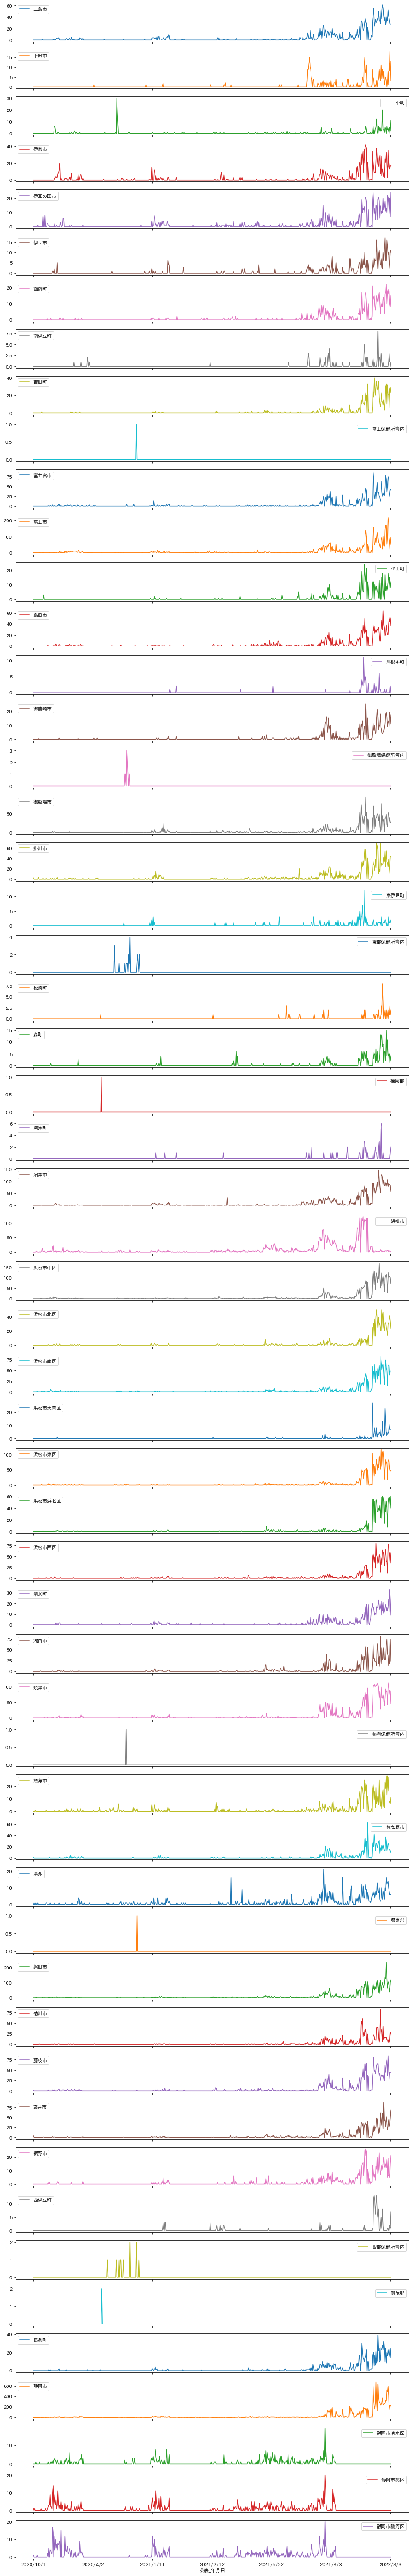

In [21]:
# グラフ化します！
df_date_place.plot(subplots=True,figsize=(15,100))

# まとめ

## 前処理が結構大変

- 居住地の記載が統一されていない
    * 県外、静岡県外、〇〇都、〇〇県・・・
    * 浜松市内、浜松市外、浜松市区、浜松市、浜松市〇〇区・・・

- 他のデータと混ざっているものあり
    * 静岡市葵区30代

## 処理しきれていないこと

- 市区町村で記述したいが情報が失われておりできない
    * 県東部、〇〇保健所管内

# 「居住地の記載が統一されていない」要因（推測）

- 個人からの了解が得られず、市区町村名で公開できなかったのでは・・・？

#  我々がすべきこと

- オープンデータ公開後にどのような使い方をされるか踏まえ、データ内容決めて公開されていたとしても、想定できないこともあるはず。
→　データを使って気がついたことがあれば、お問合せ先に連絡しよう！（ふじのくにオープンデータカタログには、お問合せ先が掲載されている）
  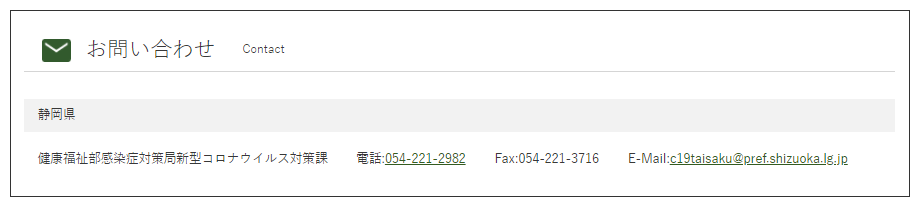

# 行政に期待すること

- データを使って施策立案！
- データ公開のためだけに時間を掛けないよう・・・仕組み化、DX

# 最後に

- Python、Jupyter Notebookは強力

## ご清聴ありがとうございました！

<img src="https://avatars.githubusercontent.com/u/13390370" width="100px">
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>